In [122]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [123]:
df=pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [124]:
columns= pd.read_csv('data_description.txt',sep='-')
columns=columns.reset_index()
# columns

In [125]:
columns.columns=(['cols','ab_col_names'])
columns
df.columns = columns['ab_col_names'].values

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood pressure           388 non-null    float64
 3   specific gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red blood cells          248 non-null    object 
 7    pus cell                335 non-null    object 
 8   pus cell clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [127]:
df.drop('id',axis=1,inplace=True)

In [128]:
nf=[feature for feature in df.columns if df[feature].dtype!='O']
print("Numerical Features:{}".format(nf))
print("Count of Features:",len(nf))

Numerical Features:['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar', 'blood glucose random', 'blood urea', 'serum creatinine', 'sodium', 'potassium', 'haemoglobin']
Count of Features: 11


In [129]:
cf=[feature for feature in df.columns if df[feature].dtype=='O']
print("Categorical Features:{}".format(cf))
print("Count of Features:",len(cf))

Categorical Features:['red blood cells', ' pus cell', 'pus cell clumps', 'bacteria', 'packed cell volume', 'white blood cell count', 'red blood cell count', 'ypertension', 'diabetes mellitus', 'coronary artery disease', 'appetite', 'pedal edema', 'anemia', 'class']
Count of Features: 14


In [130]:
for feature in cf:
    print('{}: {}'.format(feature,df[feature].unique()))

red blood cells: [nan 'normal' 'abnormal']
 pus cell: ['normal' 'abnormal' nan]
pus cell clumps: ['notpresent' 'present' nan]
bacteria: ['notpresent' 'present' nan]
packed cell volume: ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
white blood cell count: ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '2640

In [131]:
#Cleaning data
df['diabetes mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
df['coronary artery disease'].replace(to_replace={'\tno':'no'},inplace=True)
df['class'].replace(to_replace={'ckd\t':'ckd'},inplace=True)
df['red blood cell count'].replace(to_replace={'\t?':'nan'},inplace=True)
df['white blood cell count'].replace(to_replace={'\t6200':'nan','\t8400':'nan','\t?':'nan'},inplace=True)
df['packed cell volume'].replace(to_replace={'\t?':'nan','\t43':'nan'},inplace=True)

In [132]:
def convert_type(df,feature):
    df[feature] = pd.to_numeric(df[feature],errors='coerce')

In [133]:
for feature in ['packed cell volume','white blood cell count','red blood cell count']:
    convert_type(df,feature)

### Handling missing values

In [134]:
df.isnull().sum()

age                          9
blood pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
 pus cell                   65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed cell volume          72
white blood cell count     108
red blood cell count       131
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [135]:
def replace_mode(feature):   #handling categorical values
    replace_with = df[feature].mode()[0]
    df[feature].fillna(replace_with,inplace=True)

In [136]:
####replacing null values with the most frequent one for the below lists
missing_list=['appetite','pedal edema','anemia','pus cell clumps','bacteria','ypertension','diabetes mellitus','coronary artery disease']

for feature in missing_list:
    replace_mode(feature)

In [137]:
# Replacing missing value with a new variabe

# def replace_cat_feature(dataset,nan_feature):
#     data=dataset.copy()
#     data[nan_feature] = data[nan_feature].fillna('Missing')
#     return data

# df=replace_cat_feature(df,cf)
# df 

In [138]:
df.describe()

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,328.000000,292.00000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.871951,8413.69863,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,9.000955,2951.73384,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.00000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.00000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.00000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.00000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.00000,8.000000


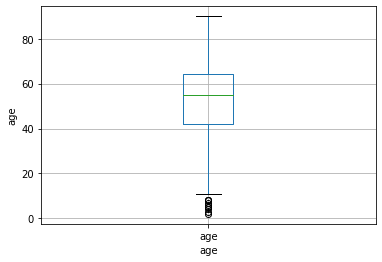

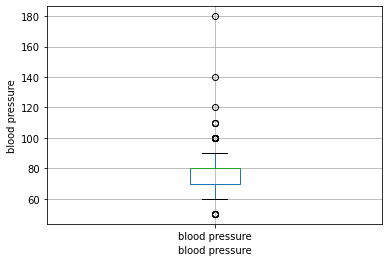

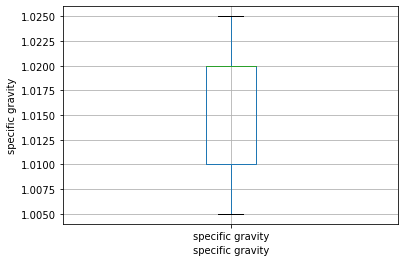

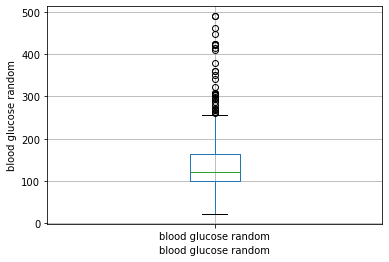

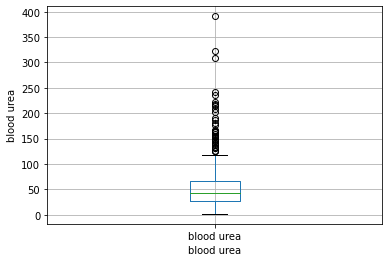

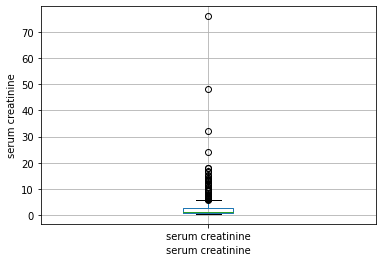

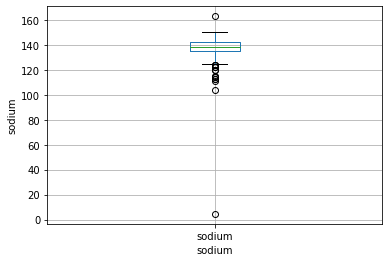

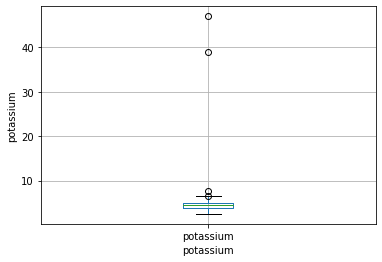

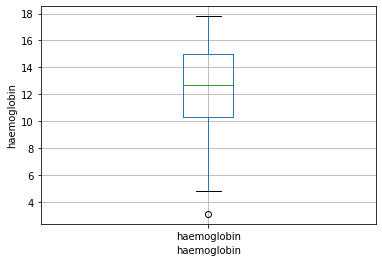

In [139]:
for feature in nf:
    if 0 in df[feature].unique():
        pass
    else:
#         df[feature]=np.log(df[feature])
        df.boxplot(column=feature)
        plt.xlabel(feature)
        plt.ylabel(feature)
        plt.show()

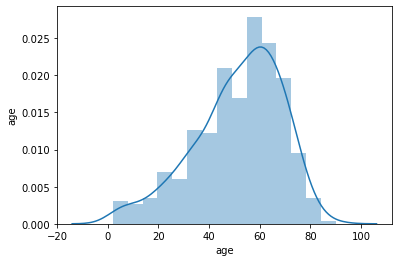

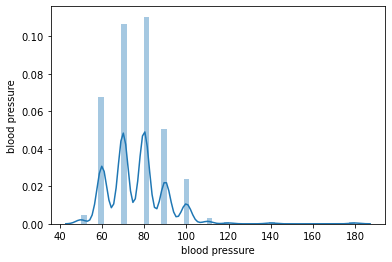

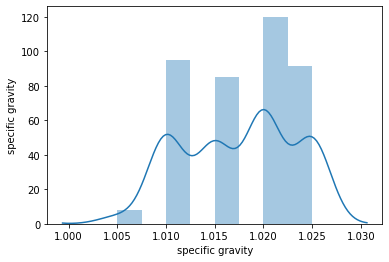

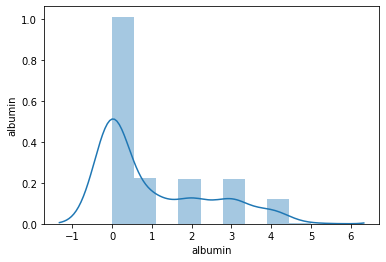

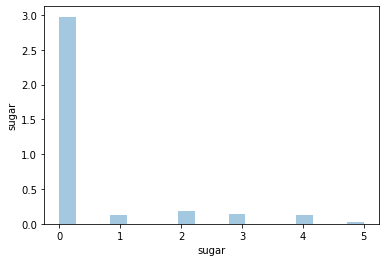

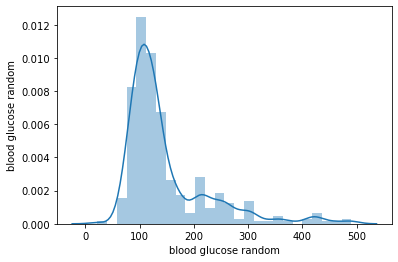

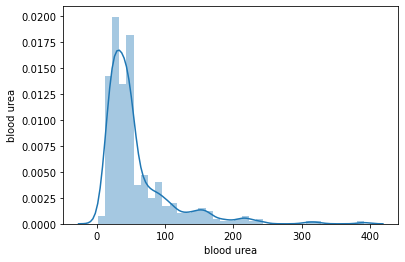

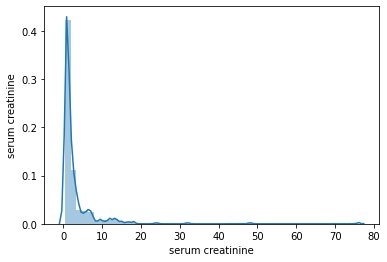

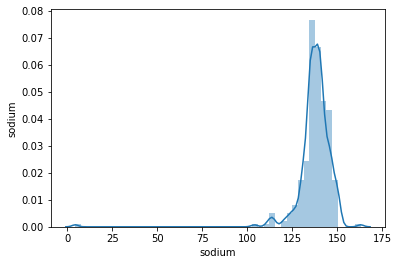

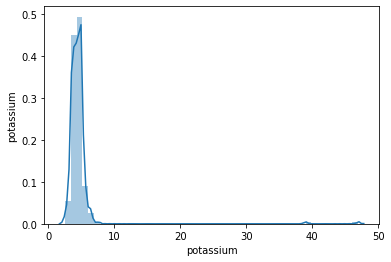

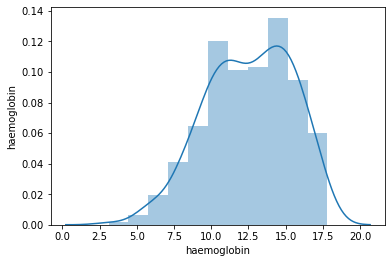

In [140]:
for feature in nf:
#     df[feature]=np.log(df[feature])
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel(feature)
    plt.show()

In [141]:
df=df.fillna(df.median())
df

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,38.0,6000.0,4.8,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [142]:
df.isnull().sum()

age                          0
blood pressure               0
specific gravity             0
albumin                      0
sugar                        0
red blood cells            152
 pus cell                   65
pus cell clumps              0
bacteria                     0
blood glucose random         0
blood urea                   0
serum creatinine             0
sodium                       0
potassium                    0
haemoglobin                  0
packed cell volume           0
white blood cell count       0
red blood cell count         0
ypertension                  0
diabetes mellitus            0
coronary artery disease      0
appetite                     0
pedal edema                  0
anemia                       0
class                        0
dtype: int64

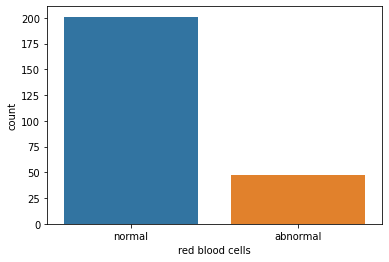

In [143]:
sns.countplot(df['red blood cells'])

In [144]:
# for feature in nf:
#     if 0 in df[feature].unique():
#         pass
#     else:
# #         df[feature]=np.log(df[feature])
#         df.boxplot(column=feature)
#         plt.xlabel(feature)
#         plt.ylabel(feature)
#         plt.show()

In [145]:
df['red blood cells'].dropna().sample()

171    normal
Name: red blood cells, dtype: object

In [146]:
df['red blood cells'].isnull().sum()

152

In [147]:
# randomily selecting values for nan/missing values 
random_sample=df['red blood cells'].dropna().sample(df['red blood cells'].isnull().sum())
random_sample

225    abnormal
191      normal
173    abnormal
36       normal
345      normal
         ...   
364      normal
289      normal
260      normal
107      normal
130      normal
Name: red blood cells, Length: 152, dtype: object

In [148]:
df[df['red blood cells'].isnull()].index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [149]:
random_sample.index

Int64Index([225, 191, 173,  36, 345, 374, 193, 377, 356, 386,
            ...
            127,  14, 378, 351,  66, 364, 289, 260, 107, 130],
           dtype='int64', length=152)

In [150]:
#this step is used so that the index should be same for the both
random_sample.index=df[df['red blood cells'].isnull()].index

In [151]:
random_sample.index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [152]:
random_sample

0      abnormal
1        normal
5      abnormal
6        normal
10       normal
         ...   
309      normal
322      normal
349      normal
350      normal
381      normal
Name: red blood cells, Length: 152, dtype: object

In [153]:
df.loc[df['red blood cells'].isnull(),'red blood cells']=random_sample

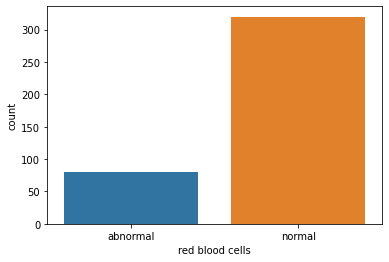

In [154]:
sns.countplot(df['red blood cells'])

In [155]:
def Random_value_imputation(feature):#all the function is executed line by line above
    random_sample=df[feature].dropna().sample(df[feature].isnull().sum())
    random_sample.index=df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature]=random_sample

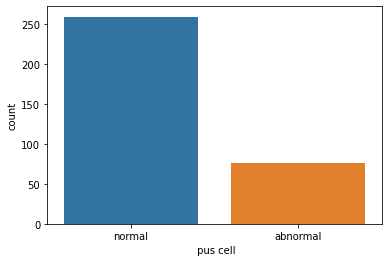

In [156]:
sns.countplot(df[' pus cell'])#before nan value imputation

In [157]:
Random_value_imputation(' pus cell')

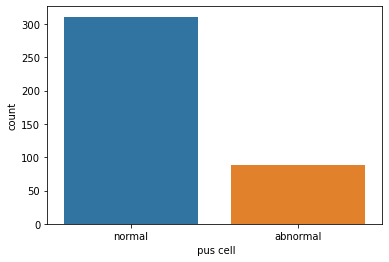

In [158]:
sns.countplot(df[' pus cell'])#after imputation

In [159]:
df.isnull().sum()

age                        0
blood pressure             0
specific gravity           0
albumin                    0
sugar                      0
red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed cell volume         0
white blood cell count     0
red blood cell count       0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

## Handling Categorical Values

In [160]:
### looking how many categories are there in each feature
for feature in cf:
    print('{}:\n{}\n'.format(feature,df[feature].value_counts()))

red blood cells:
normal      320
abnormal     80
Name: red blood cells, dtype: int64

 pus cell:
normal      311
abnormal     89
Name:  pus cell, dtype: int64

pus cell clumps:
notpresent    358
present        42
Name: pus cell clumps, dtype: int64

bacteria:
notpresent    378
present        22
Name: bacteria, dtype: int64

packed cell volume:
40.0    88
41.0    21
52.0    21
44.0    19
48.0    19
43.0    14
45.0    13
42.0    13
50.0    12
32.0    12
28.0    12
33.0    12
36.0    12
37.0    11
34.0    11
29.0     9
46.0     9
35.0     9
30.0     9
31.0     8
39.0     7
24.0     7
26.0     6
38.0     5
54.0     4
51.0     4
53.0     4
49.0     4
47.0     4
27.0     3
25.0     3
22.0     3
23.0     2
19.0     2
16.0     1
15.0     1
21.0     1
20.0     1
17.0     1
9.0      1
18.0     1
14.0     1
Name: packed cell volume, dtype: int64

white blood cell count:
8000.0     111
9800.0      11
6700.0      10
9200.0       9
9600.0       9
          ... 
16300.0      1
18900.0      1
16700.0 

In [161]:
from sklearn.preprocessing import LabelEncoder

In [162]:
lb=LabelEncoder()

In [163]:
for feature in cf:
    df[feature] = lb.fit_transform(df[feature])
#     data= pd.get_dummies(data,columns=['red blood cells', ' pus cell', 'pus cell clumps', 'bacteria', 'ypertension', 'diabetes mellitus', 'coronary artery disease', 'appetite', 'pedal edema', 'anemia', 'class'],drop_first=True)

In [164]:
df#0-->ckd, 1-->notckd

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,...,31,35,30,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,25,19,26,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,18,33,26,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,19,25,17,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,22,31,24,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,34,25,27,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,41,35,40,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,36,24,32,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,38,30,37,0,0,0,0,0,0,1


In [165]:
df.describe()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.562500,76.575000,1.017712,0.90000,0.395000,0.800000,0.777500,0.105000,0.055000,145.062500,...,26.085000,38.160000,25.347500,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000,0.375000
std,16.982996,13.489785,0.005434,1.31313,1.040038,0.400501,0.416446,0.306937,0.228266,75.260774,...,8.125444,17.640646,8.291176,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,101.000000,...,21.000000,28.000000,23.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,121.000000,...,27.000000,37.000000,26.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,150.000000,...,31.000000,49.000000,29.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,41.000000,88.000000,44.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


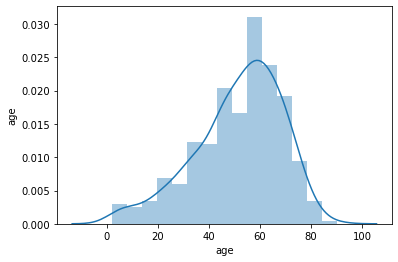

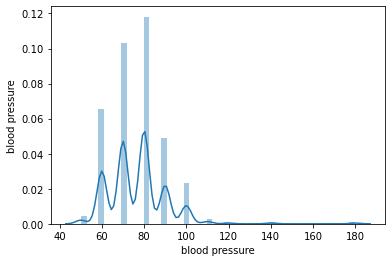

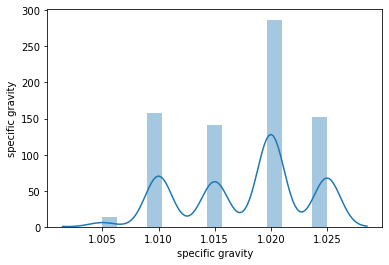

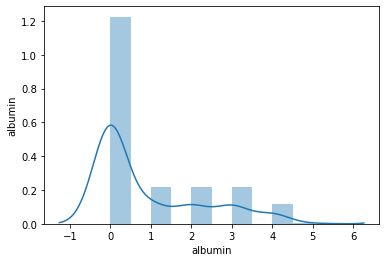

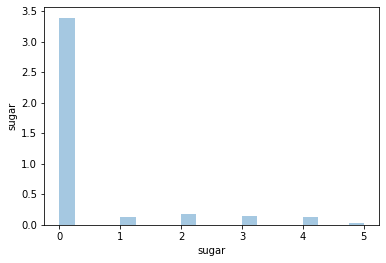

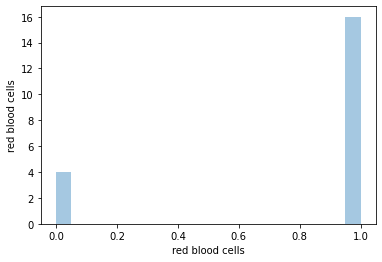

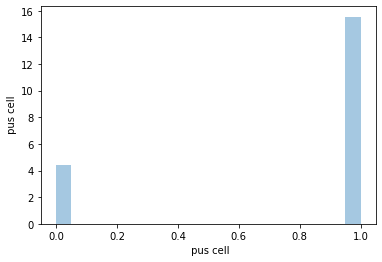

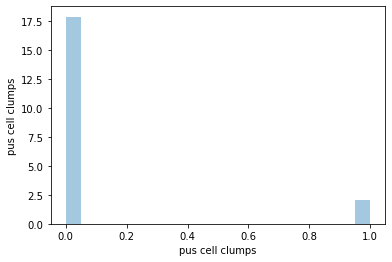

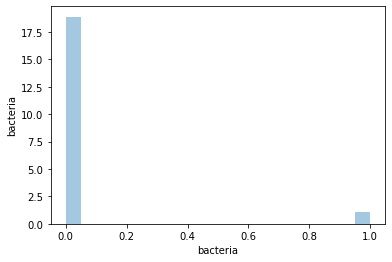

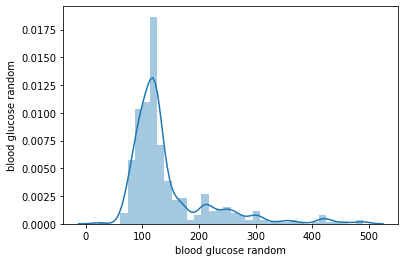

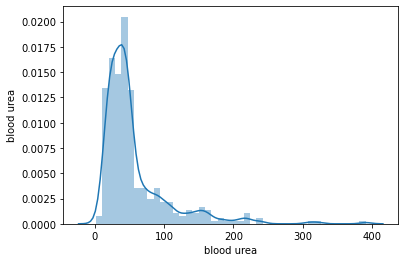

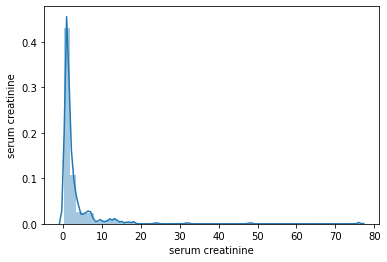

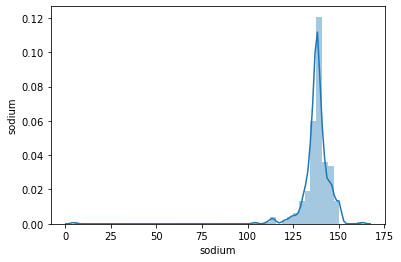

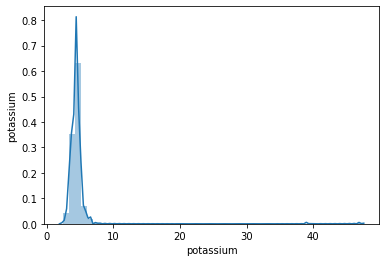

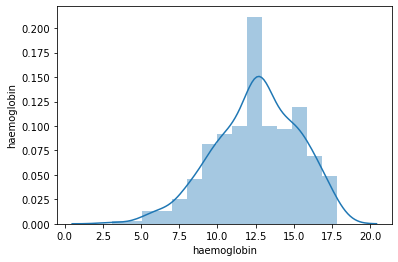

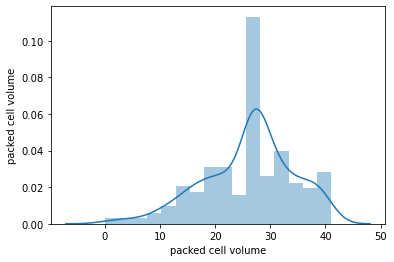

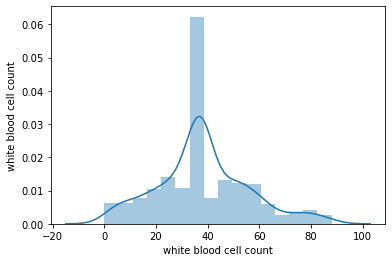

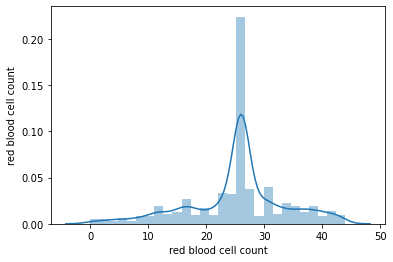

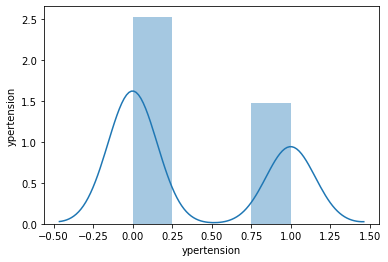

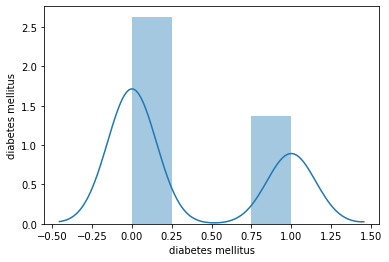

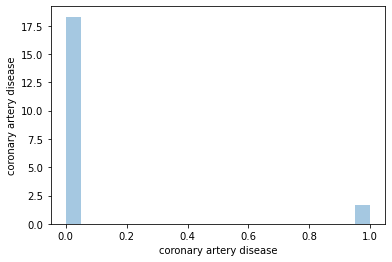

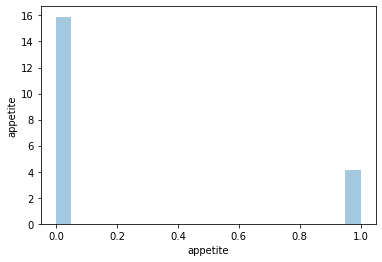

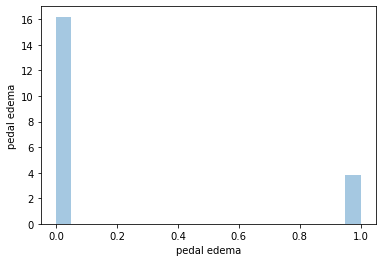

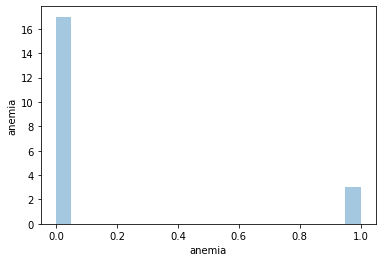

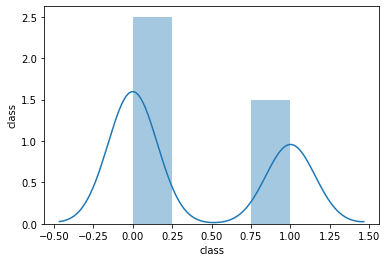

In [166]:
for feature in df.columns:
#     df[feature] = np.log(df[feature])
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel(feature)
    plt.show()

In [167]:
# df[df.apply(lambda row: row.astype(str).str.contains('Missing',case=False).any(),axis=1)]
# data_nan=df.dropna()
# data_nan

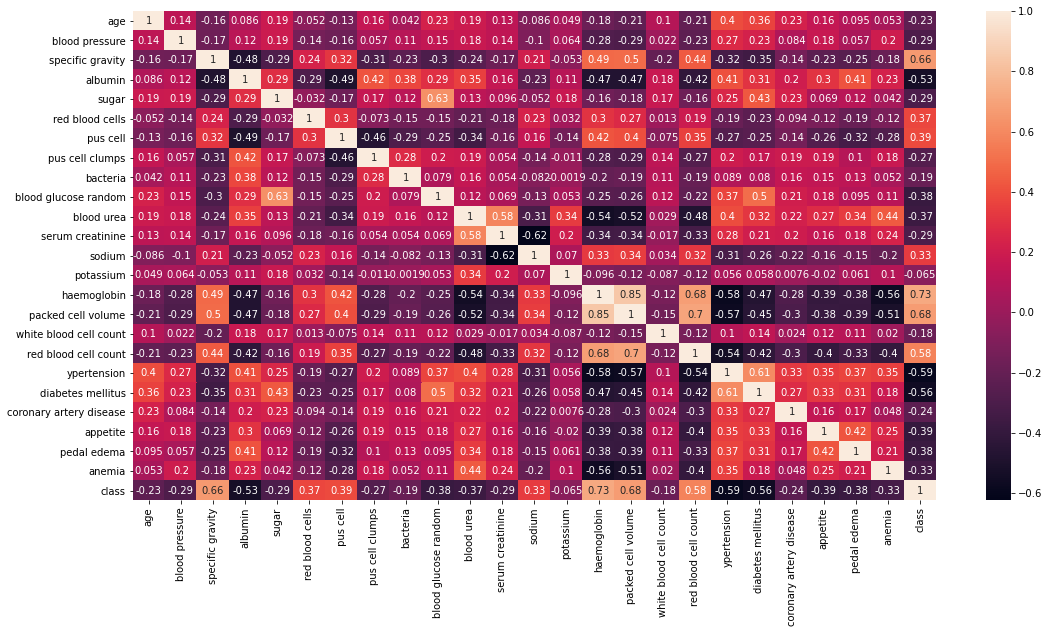

In [168]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),annot=True)

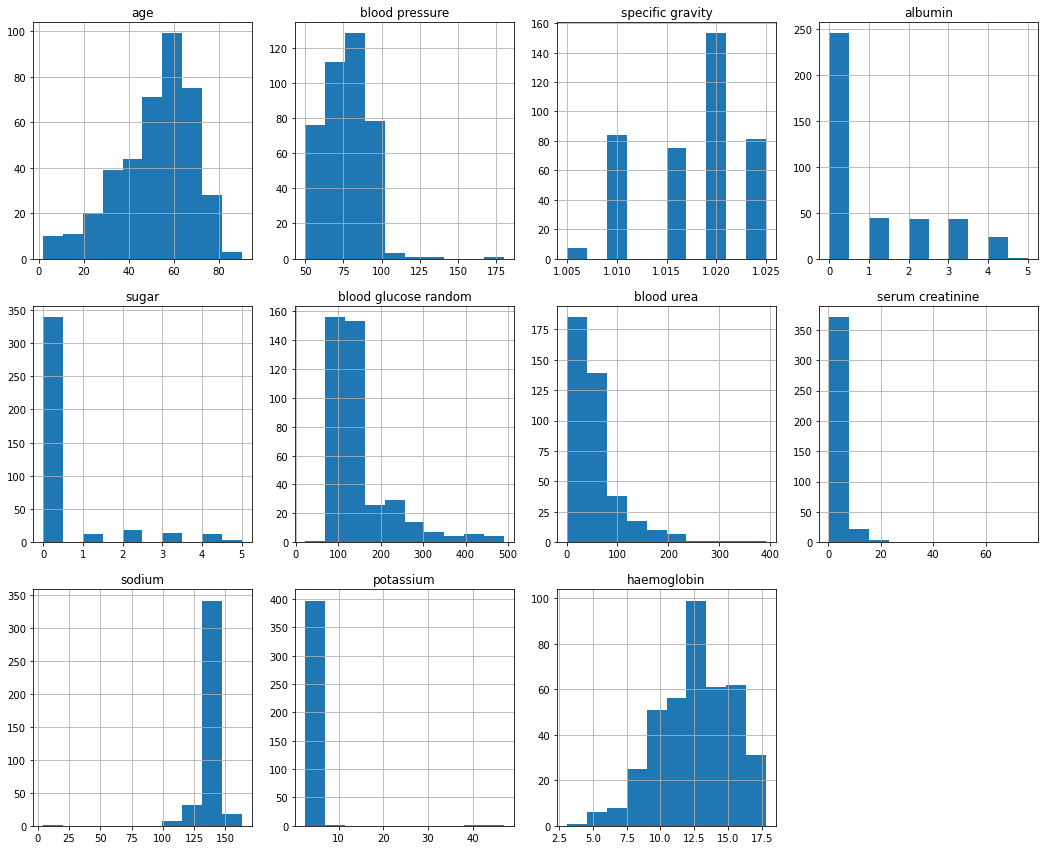

In [169]:
plt.figure(figsize=(18,20))

for i,feature in enumerate(nf):
    plt.subplot(4,4,i+1)
    df[feature].hist()
    plt.title(feature)

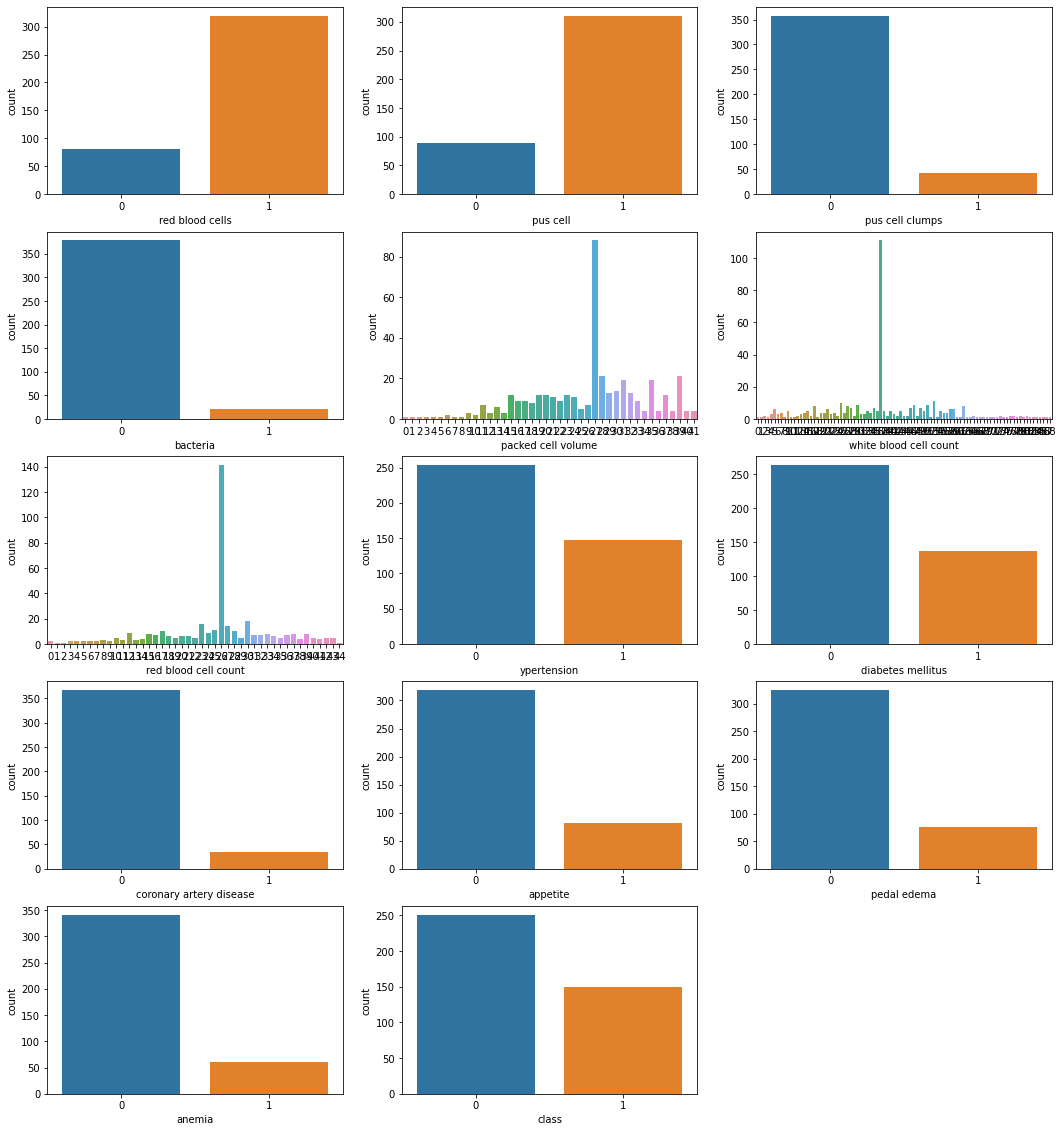

In [170]:
plt.figure(figsize=(18,20))

for i,feature in enumerate(cf):
    plt.subplot(5,3,i+1)
    sns.countplot(df[feature])

### Bivariate Analysis

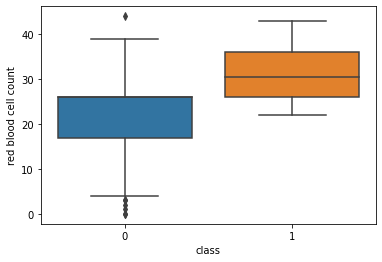

In [171]:
sns.boxplot(x='class',y='red blood cell count',data=df)

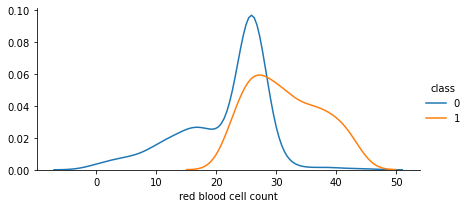

In [172]:
grid=sns.FacetGrid(df,hue='class',aspect=2)
grid.map(sns.kdeplot,'red blood cell count')
grid.add_legend()

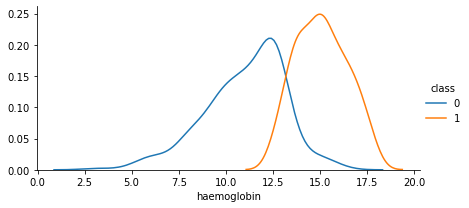

In [173]:
grid=sns.FacetGrid(df,hue='class',aspect=2)
grid.map(sns.kdeplot,'haemoglobin')
grid.add_legend()

In [174]:
# sns.pairplot(df,hue='class')

In [175]:
import plotly.express as px

In [176]:
px.violin(df,y='red blood cell count',x='class',color='class')

In [177]:
px.scatter(df,x='haemoglobin',y='packed cell volume',color='class')

In [178]:
px.violin(df,y='packed cell volume',x='class',color='class')

In [179]:
px.scatter(df,x='red blood cell count',y='albumin',color='class')

In [180]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [181]:
ind_col=[col for col in df.columns if col!='class']
dep_col='class'

In [182]:
X=df[ind_col]
y=df[dep_col]

In [183]:
X

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,...,15.4,31,35,30,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,11.3,25,19,26,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,18,33,26,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,19,25,17,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,22,31,24,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,34,25,27,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,41,35,40,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,36,24,32,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,14.2,38,30,37,0,0,0,0,0,0


In [184]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int32

In [185]:
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

In [186]:
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x00000196AEFF48B0>)

In [187]:
ordered_feature.scores_

array([1.15859940e+02, 8.17867015e+01, 5.03531613e-03, 2.16000000e+02,
       9.48000000e+01, 1.12133333e+01, 1.35050375e+01, 2.52000000e+01,
       1.32000000e+01, 2.24165129e+03, 2.34309714e+03, 3.57792101e+02,
       2.75587488e+01, 2.95133869e+00, 1.23856342e+02, 4.61414632e+02,
       1.05379734e+02, 3.60743328e+02, 8.82000000e+01, 8.22000000e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [188]:
datascore=pd.DataFrame(ordered_feature.scores_,columns=['Scores'])

In [189]:
datascore

,Scores
0,115.859940
1,81.786701
2,0.005035
3,216.000000
4,94.800000
5,11.213333
6,13.505038
7,25.200000
8,13.200000
9,2241.651289


In [190]:
dfcols=pd.DataFrame(X.columns)
dfcols

,0
0,age
1,blood pressure
2,specific gravity
3,albumin
4,sugar
5,red blood cells
6,pus cell
7,pus cell clumps
8,bacteria
9,blood glucose random


In [191]:
features_rank=pd.concat([dfcols,datascore],axis=1)
features_rank

,0,Scores
0,age,115.859940
1,blood pressure,81.786701
2,specific gravity,0.005035
3,albumin,216.000000
4,sugar,94.800000
5,red blood cells,11.213333
6,pus cell,13.505038
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2241.651289


In [192]:
features_rank.columns=['features','Score']
features_rank

,features,Score
0,age,115.859940
1,blood pressure,81.786701
2,specific gravity,0.005035
3,albumin,216.000000
4,sugar,94.800000
5,red blood cells,11.213333
6,pus cell,13.505038
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2241.651289


In [193]:
features_rank.nlargest(10,'Score')

,features,Score
10,blood urea,2343.097145
9,blood glucose random,2241.651289
15,packed cell volume,461.414632
17,red blood cell count,360.743328
11,serum creatinine,357.792101
3,albumin,216.000000
14,haemoglobin,123.856342
0,age,115.859940
16,white blood cell count,105.379734
4,sugar,94.800000


In [194]:
selected_features=features_rank.nlargest(10,'Score')['features'].values

In [195]:
selected_features

array(['blood urea', 'blood glucose random', 'packed cell volume',
       'red blood cell count', 'serum creatinine', 'albumin',
       'haemoglobin', 'age', 'white blood cell count', 'sugar'],
      dtype=object)

In [196]:
X_new=df[selected_features]

In [197]:
X_new.head()

,blood urea,blood glucose random,packed cell volume,red blood cell count,serum creatinine,albumin,haemoglobin,age,white blood cell count,sugar
0,36.0,121.0,31,30,1.2,1.0,15.4,48.0,35,0.0
1,18.0,121.0,25,26,0.8,4.0,11.3,7.0,19,0.0
2,53.0,423.0,18,26,1.8,2.0,9.6,62.0,33,3.0
3,56.0,117.0,19,17,3.8,4.0,11.2,48.0,25,0.0
4,26.0,106.0,22,24,1.4,2.0,11.6,51.0,31,0.0


In [198]:
len(X_new)

400

In [199]:
X_new.shape

(400, 10)

In [200]:
from sklearn.model_selection import train_test_split

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=0)

In [202]:
X_train.shape

(300, 10)

In [203]:
X_test.shape

(100, 10)

In [204]:
y_train.value_counts()

0    188
1    112
Name: class, dtype: int64

In [205]:
# !pip install xgboost

In [206]:
from xgboost import XGBClassifier

In [207]:
xg_classifier=XGBClassifier()

In [208]:
params={
    'learning_rate':[0.05,0.20,0.25],
    'max_depth':[5,8,10],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.4],
    'colsample_bytree':[0.3,0.4,0.7]
    
}

In [210]:
from sklearn.model_selection import RandomizedSearchCV

In [211]:
random_search=RandomizedSearchCV(xg_classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [212]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.05, 0.2, 0.25],
                                        'max_depth': [5, 8, 10],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [213]:
print(random_search.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [214]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.05,
 'gamma': 0.0,
 'colsample_bytree': 0.4}

In [222]:
classifier=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None)

In [223]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [224]:
y_pred=classifier.predict(X_test)

In [225]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [226]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [227]:
confusion_matrix(y_test,y_pred)

array([[61,  1],
       [ 0, 38]], dtype=int64)

In [228]:
accuracy_score(y_test,y_pred)

0.99

In [229]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [232]:
models=[]

lr=LogisticRegression()
dct=DecisionTreeClassifier()
rfc=RandomForestClassifier()
nb=GaussianNB()

models.append(('LogisticRegression',lr))
models.append(('Decision Tree',dct))
models.append(('Random Forest',rfc))
models.append(('Naive Bayes',nb))

In [245]:
# names=[]
# for i in range(len(models)):
#     names.append(models[i][i*0])
# print(names)

In [252]:
accuracy=[]
print(type(accuracy))

for name, model in models:
    print(name)
    
    model.fit(X_train,y_train)
    
    pred=model.predict(X_test)
    
    print(confusion_matrix(y_test,pred))
    print('\n')
    
    acc=accuracy_score(y_test,pred)
    accuracy.append(acc)
    print(acc)
    print('\n')

<class 'list'>
LogisticRegression
[[60  2]
 [ 2 36]]


0.96


Decision Tree
[[60  2]
 [ 0 38]]


0.98


Random Forest
[[61  1]
 [ 0 38]]


0.99


Naive Bayes
[[59  3]
 [ 0 38]]


0.97


